
Visit original tutorial page: https://morvanzhou.github.io/tutorials/

Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:

- torch: 0.4
- matplotlib

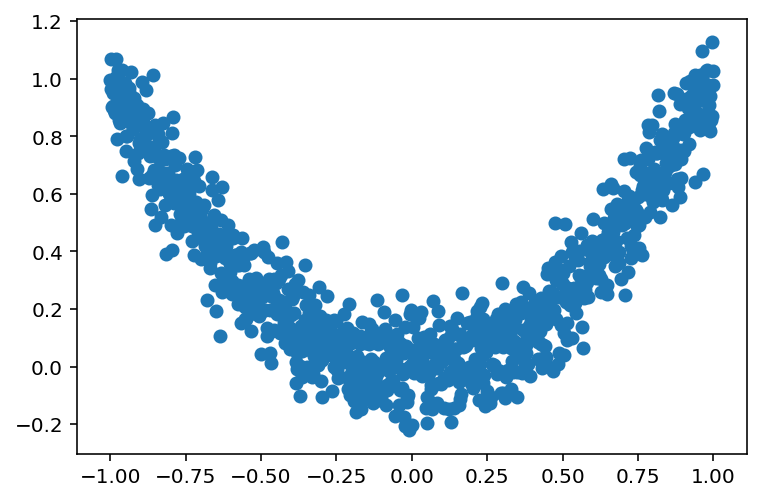

In [6]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1) # reproducible

LR = 0.1
BATCH_SIZE = 32
EPOCH = 12

# DATASET

x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2)  + 0.1*torch.normal(torch.zeros(*x.size()))

# a = torch.zeros(*x.size())
# b = torch.zeros(x.size())
# for i in range (x.size()[0]):
#     print(a[i], b[i])
# plot dataset
%config InlineBackend.figure_format ='retina'
plt.scatter(x.numpy(), y.numpy())
plt.show()


In [4]:
# put dataset  into torch dataset
torch_dataset=Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE,
                         shuffle=True, num_workers=2,)


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


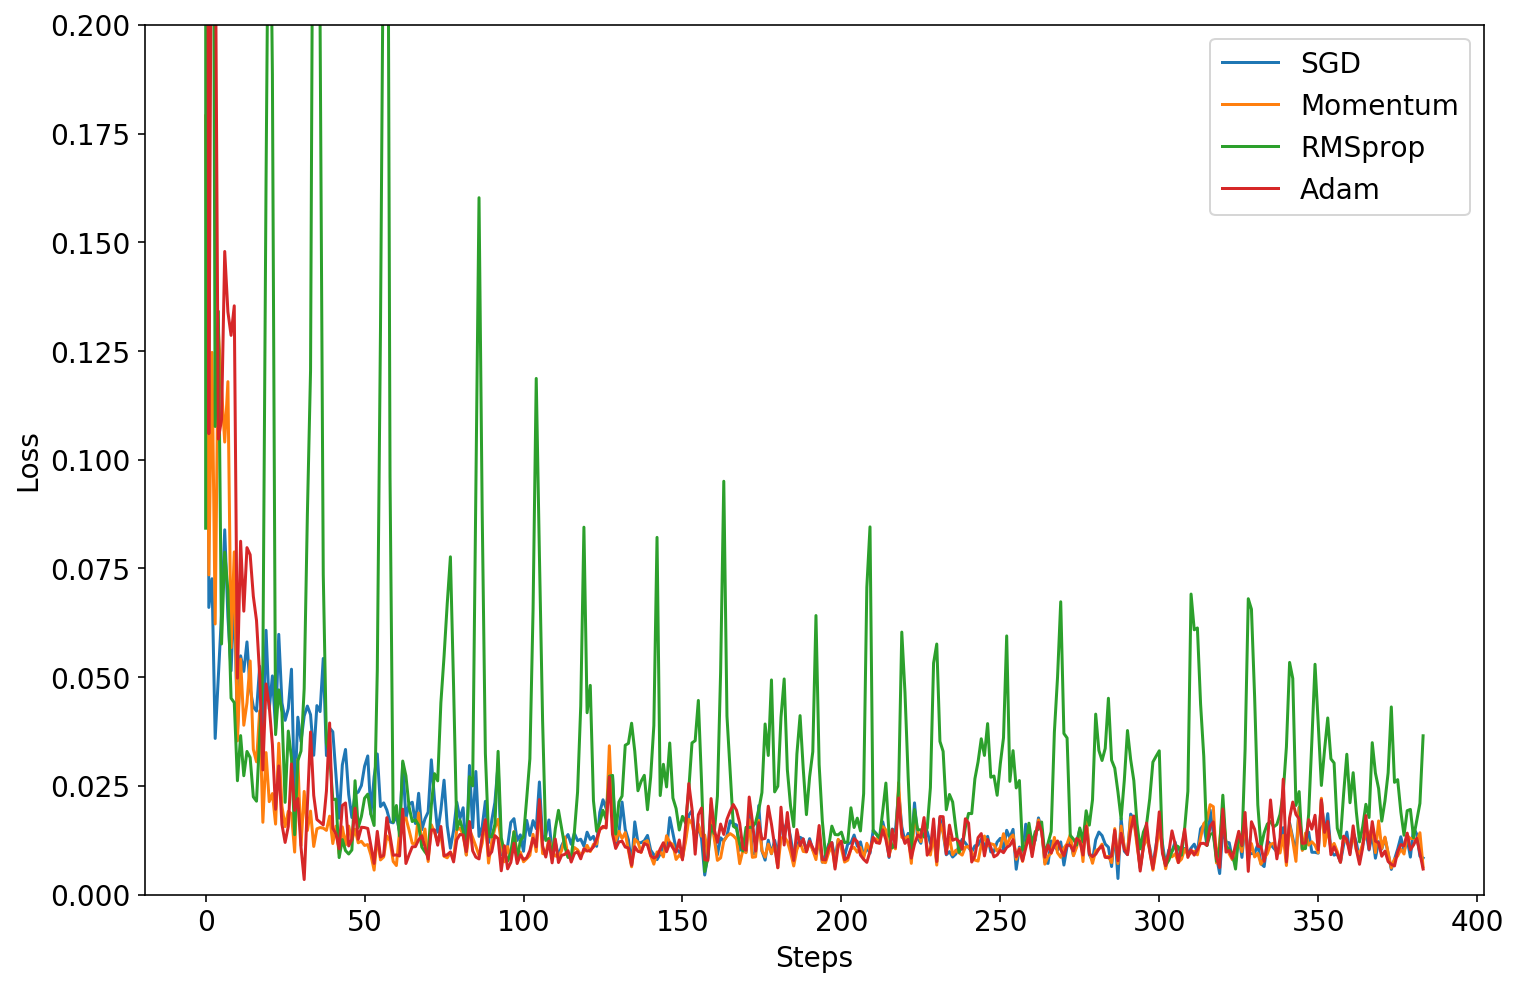

In [26]:
# default network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)  # hidden layer
        self.predict = torch.nn.Linear(20, 1) # output layer
        
    def forward(self, x):
        x = F.relu(self.hidden(x)) # activation function for hidden layer
        x = self.predict(x)        # linear output
        return x
    
if __name__ == '__main__':
    # different nets
    net_SGD          = Net()
    net_Momentum     = Net()
    net_RMSprop      = Net()
    net_Adam         = Net()
    nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]
    
    # different optimizers
    
    opt_SGD          = torch.optim.SGD(net_SGD.parameters(), lr=LR)
    opt_Momentum     = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
    opt_RMSprop      = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
    opt_Adam         = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
    
    optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]
    
    loss_func=torch.nn.MSELoss()
    losses_his=[[],[],[],[]] # record loss
    
    # training
    for epoch in range(EPOCH):             # for each training step
        print('Epoch: ', epoch )
        for step, (b_x, b_y) in enumerate(loader):
            for net, opt, l_his in zip(nets, optimizers, losses_his):
                output = net(b_x)              # get output for every net
                loss = loss_func(output, b_y)  # compute loss for every net
                opt.zero_grad()                # clear gradients for next train
                loss.backward()                # backpropagaion, compute gradients
                opt.step()                     # apply gradients
                l_his.append(loss.data.numpy())
    
    %config InlineBackend.figure_format ='retina'
    fig = plt.figure(1, figsize=(12, 8))
    ax = fig.add_subplot()
    labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
    for i, l_his in enumerate(losses_his):
        ax.plot(l_his, label=labels[i])
    ax.legend(loc='best')
    
    plt.ylim((0,0.2))    
    plt.xlabel('Steps')
    plt.ylabel('Loss')
#     plt.rcParams.update({'font.size': 15})
    plt.show()